In [1]:
#!pip install --user tensorflow
!python.exe -m pip install tensorflow --user

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import pandas as pd



In [16]:
# Caricamento dei dati
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Puoi lavorare direttamente su train
df = train.copy()

# 1️⃣ Convertire Sex in numerico
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# 2️⃣ Gestire valori mancanti in Age
print("Valori mancanti in Age:", df['Age'].isnull().sum())
df['Age'].fillna(df['Age'].median(), inplace=True)

# 3️⃣ Valutare la colonna Cabin (eliminarla)
print("Percentuale valori mancanti in Cabin:", df['Cabin'].isnull().sum() / len(df))
df.drop('Cabin', axis=1, inplace=True)

# 4️⃣ Gestire Embarked
print("Valori mancanti in Embarked:", df['Embarked'].isnull().sum())
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# 🔎 Controllo finale
print(df.isnull().sum())
df.head()

Valori mancanti in Age: 177
Percentuale valori mancanti in Cabin: 0.7710437710437711
Valori mancanti in Embarked: 2
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\net.SIS-03\AppData\Local\Temp\ipykernel_17316\3741081200.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


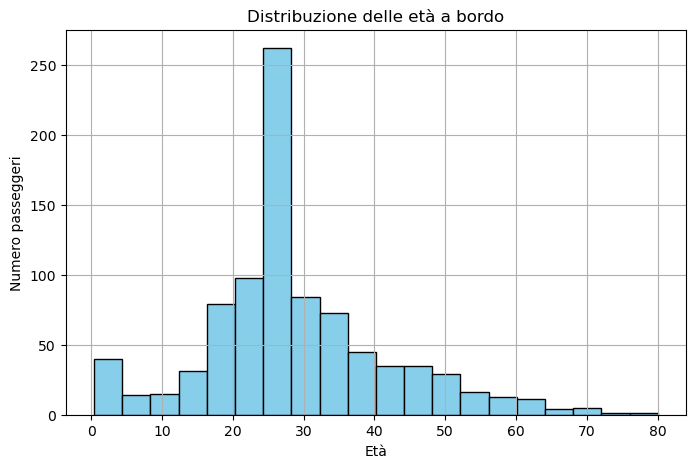

In [4]:
plt.figure(figsize=(8,5))
df["Age"].hist(bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Età")
plt.ylabel("Numero passeggeri")
plt.title("Distribuzione delle età a bordo")
plt.show()

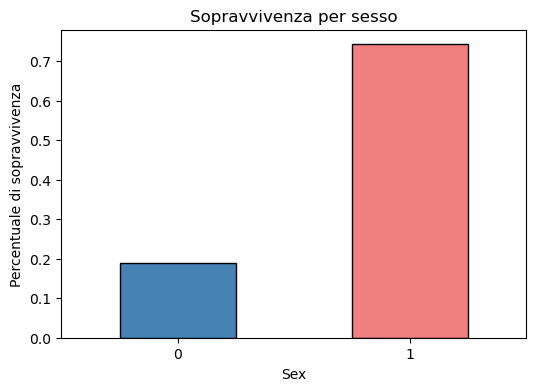

In [5]:
plt.figure(figsize=(6,4))
df.groupby("Sex")["Survived"].mean().plot(kind="bar", color=['steelblue','lightcoral'], edgecolor='black')
plt.ylabel("Percentuale di sopravvivenza")
plt.title("Sopravvivenza per sesso")
plt.xticks(rotation=0)
plt.show()

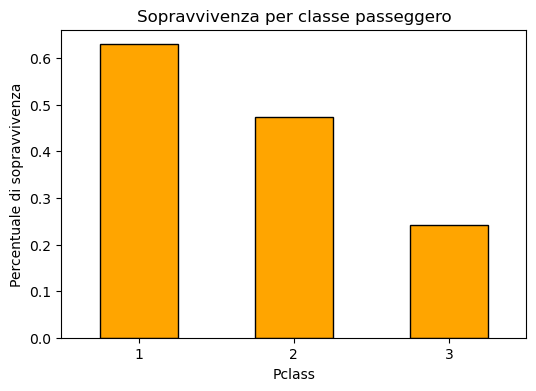

In [6]:
plt.figure(figsize=(6,4))
df.groupby("Pclass")["Survived"].mean().plot(kind="bar", color='orange', edgecolor='black')
plt.ylabel("Percentuale di sopravvivenza")
plt.title("Sopravvivenza per classe passeggero")
plt.xticks(rotation=0)
plt.show()


<Figure size 800x500 with 0 Axes>

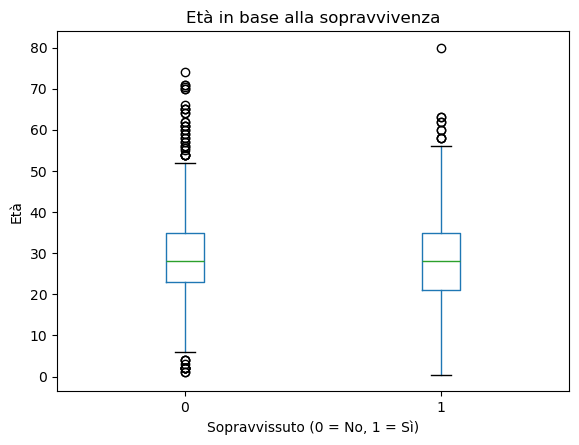

In [7]:
plt.figure(figsize=(8,5))
df.boxplot(column="Age", by="Survived", grid=False)
plt.title("Età in base alla sopravvivenza")
plt.suptitle("")  # Rimuove il titolo automatico di pandas
plt.xlabel("Sopravvissuto (0 = No, 1 = Sì)")
plt.ylabel("Età")
plt.show()


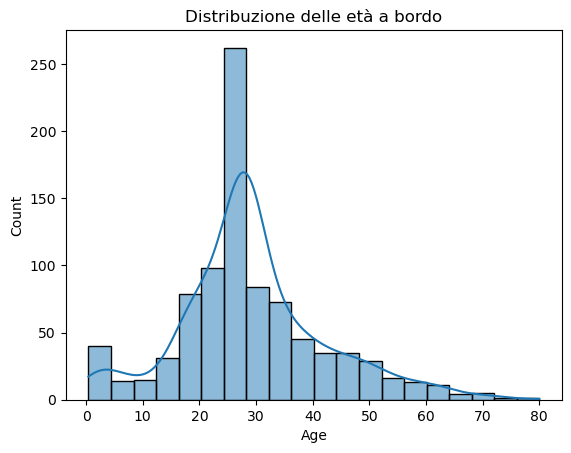

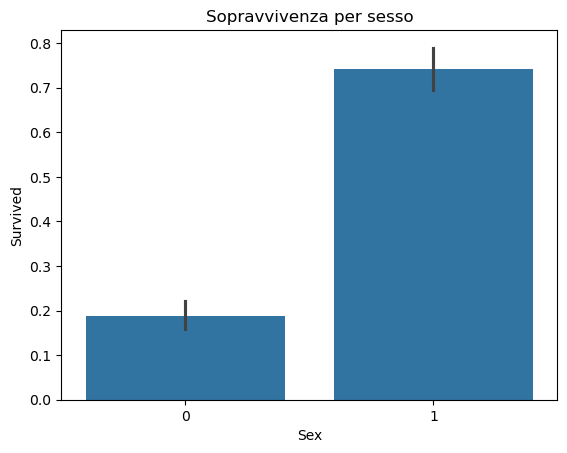

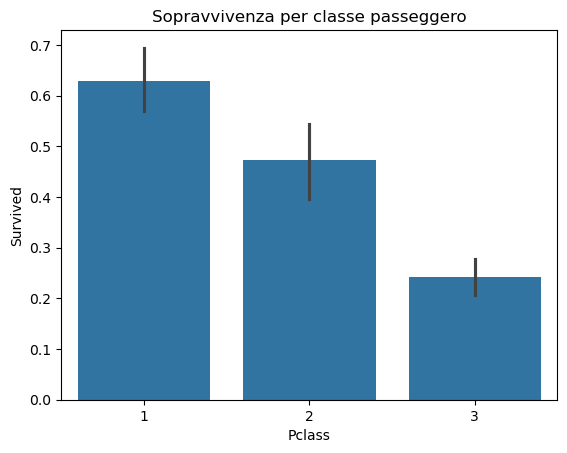

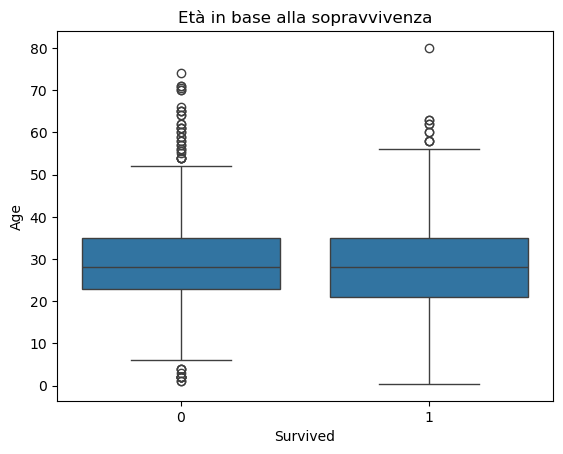

In [8]:
import seaborn as sns

# Distribuzione età
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Distribuzione delle età a bordo")
plt.show()

# Sopravvivenza per sesso
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Sopravvivenza per sesso")
plt.show()

# Sopravvivenza per classe
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Sopravvivenza per classe passeggero")
plt.show()

# Boxplot Età vs Sopravvivenza
sns.boxplot(x="Survived", y="Age", data=df)
plt.title("Età in base alla sopravvivenza")
plt.show()

In [12]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Rimozione delle colonne inutili
train = train[features + [target]]
test = test[features]

# Gestione dei valori mancanti
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])

# Conversione delle variabili categoriche in numeriche
le = LabelEncoder()
for col in ['Sex', 'Embarked']:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

# Separazione in X (input) e y (target)
X = train[features]
y = train[target]

# Normalizzazione delle feature numeriche
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(test)

# Divisione in train e validation set
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Carico il dataset
df = pd.read_csv("train.csv")

# 2. Pulizia e preprocessing
# Seleziono solo le colonne utili
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
target = "Survived"

df = df[features + [target]]

# Gestione valori mancanti (senza usare inplace=True)
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Fare"] = df["Fare"].fillna(df["Fare"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# Encoding delle variabili categoriche
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])
df["Embarked"] = le.fit_transform(df["Embarked"])

# 3. Separo X e y
X = df[features]
y = df[target]

# (facoltativo) normalizzazione per modelli come Logistic Regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Divisione in train e test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. Addestramento del modello
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# 6. Valutazione
predictions = model.predict(X_test)

print("✅ Accuracy:", round(accuracy_score(y_test, predictions), 3))
print("\n📊 Classification Report:\n", classification_report(y_test, predictions))
print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_test, predictions))

✅ Accuracy: 0.804

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179


🔹 Confusion Matrix:
 [[90 15]
 [20 54]]


✅ Accuracy Decision Tree: 0.799


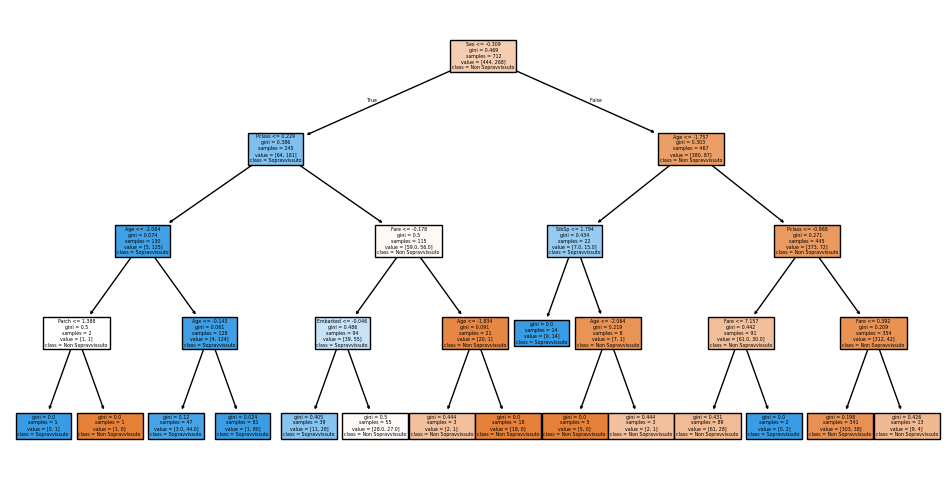

In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Addestramento
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

# Valutazione
pred = tree.predict(X_test)
print("✅ Accuracy Decision Tree:", round(accuracy_score(y_test, pred), 3))

# Visualizzazione dell'albero
plt.figure(figsize=(12,6))
plot_tree(tree, feature_names=features, class_names=["Non Sopravvissuto", "Sopravvissuto"], filled=True)
plt.show()